In [1]:
# 以沪深300数据集为例，构建特征和目标值，使用线性回归模型(OLS方法)拟合特征与目标值，并评估模型
import pandas as pd
from scutquant import scutquant, alpha

In [2]:
# 读取数据
df = pd.read_csv('D:/Desktop/CSI300.csv')
df.set_index(['datetime', 'instrument'], inplace=True)
df

open       close        high         low  \
datetime   instrument                                                   
2014-01-02 000001.SZ   635.888675  641.659942  645.332567  632.216051   
           000002.SZ   698.349657  698.349657  705.341894  692.231450   
           000063.SZ   134.054266  141.217471  141.626797  133.747271   
           000069.SZ   145.669853  145.669853  147.331486  145.392914   
           000100.SZ     5.021215    4.999665    5.042765    4.978115   
...                           ...         ...         ...         ...   
2021-12-31 688363.SH   157.171673  155.906750  158.577143  154.280421   
           688396.SH    65.009027   64.708523   65.109195   64.227717   
           688561.SH    84.630000   87.920000   88.580000   84.620000   
           688599.SH    80.245542   80.143966   82.805274   79.209461   
           688981.SH    52.900000   52.990000   53.450000   52.740000   

                           volume        amount  
datetime   instrument                            
2014-01-02 000001.SZ   48991089.0  5.962237e+08  
           000002.SZ   48529922.0  3.873911e+08  
           000063.SZ   48647434.0  6.581458e+08  
           000069.SZ   15969615.0  8.446668e+07  
           000100.SZ   76023597.0  1.762902e+08  
...                           ...           ...  
2021-12-31 688363.SH    2509838.0  3.890786e+08  
           688396.SH    6577640.0  4.245949e+08  
           688561.SH    2114831.0  1.848976e+08  
           688599.SH   17798053.0  1.422437e+09  
           688981.SH   14307271.0  7.589443e+08  

[439752 rows x 6 columns]

In [3]:
# 清洗数据
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 439752 entries, ('2014-01-02', '000001.SZ') to ('2021-12-31', '688981.SH')
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    439752 non-null  float64
 1   close   439752 non-null  float64
 2   high    439752 non-null  float64
 3   low     439752 non-null  float64
 4   volume  439752 non-null  float64
 5   amount  439752 non-null  float64
dtypes: float64(6)
memory usage: 21.9+ MB


In [4]:
df.describe()

,open,close,high,low,volume,amount
count,439752.000000,439752.000000,439752.000000,439752.000000,4.397520e+05,4.397520e+05
mean,260.862828,261.137145,265.868723,256.275894,4.752170e+07,7.605946e+08
std,683.097795,683.701009,694.236861,672.710195,1.115253e+08,1.291948e+09
min,1.613802,1.613802,1.623952,1.603653,1.245400e+05,1.188330e+06
25%,22.067217,22.100009,22.470149,21.731123,6.953532e+06,1.592893e+08
50%,79.961379,80.027467,81.510380,78.587627,1.873052e+07,3.535504e+08
75%,225.679587,225.938598,230.057610,221.534178,4.621642e+07,8.105822e+08
max,16995.086560,17080.588000,17257.107110,16318.823980,5.135466e+09,4.969251e+10


In [5]:
# 下面开始构造目标值和特征
df['label'] = scutquant.price2ret(df['close'], shift1=-1, shift2=-2, groupby='instrument')

feature_kwargs = {
    'data': df,
    'price': 'close',
    'label': 'label',
    'last_close': 'open',
    'volume': 'volume',
    'amount': 'amount',
    'high': 'high',
    'low': 'low',
    'shift': 2,
    'groupby': 'instrument'
}
features = alpha.make_factors(feature_kwargs, windows=[5, 10, 20, 30, 60])
X = pd.concat([features, df['label']], axis=1)

X.describe()

,ma5,std5,max5,min5,beta5,roc5,ma10,std10,max10,min10,...,rsv10,rsv20,rsv30,rsv60,klen5,klen10,klen20,klen30,klen60,label
count,437928.000000,437928.000000,437928.000000,437928.000000,4.391440e+05,4.391440e+05,436408.000000,436408.000000,436408.000000,436408.000000,...,437016.000000,433976.000000,430936.000000,421817.000000,438536.000000,437016.000000,433976.000000,430936.000000,421817.000000,439144.000000
mean,0.001638,0.029666,0.040429,-0.033619,-2.399689e-07,-5.872509e+04,0.001647,0.031609,0.058816,-0.047406,...,11.737807,11.658433,11.570935,11.307076,0.035691,0.035694,0.035724,0.035763,0.035861,0.001626
std,0.018432,0.034527,0.068070,0.038609,1.275952e-02,4.400414e+07,0.012528,0.032394,0.090018,0.047187,...,66.610864,66.363319,65.863537,63.973617,0.018124,0.016963,0.016011,0.015502,0.014633,0.044673
min,-0.168086,0.000000,-0.079832,-0.800138,-1.000408e+00,-3.793733e+09,-0.090841,0.001039,-0.011142,-0.800138,...,-0.999743,-0.999731,-0.999730,-0.999730,0.002207,0.003968,0.005229,0.005450,0.005940,-0.800138
25%,-0.005676,0.013287,0.013098,-0.040875,-4.246242e-03,-2.034335e+00,-0.003551,0.015707,0.023184,-0.057962,...,-0.803140,-0.803661,-0.804411,-0.807043,0.022483,0.023283,0.023932,0.024265,0.025023,-0.012836
50%,0.000522,0.021703,0.026316,-0.023179,-1.425087e-05,-1.000000e+00,0.000694,0.024349,0.040071,-0.033962,...,-0.079365,-0.085158,-0.090901,-0.107513,0.032529,0.033090,0.033489,0.033714,0.034191,0.000000
75%,0.007587,0.035374,0.048159,-0.012536,4.150956e-03,-2.639057e-02,0.005684,0.037537,0.067642,-0.020872,...,3.857435,3.822756,3.799040,3.699147,0.045101,0.044861,0.044688,0.044604,0.044387,0.013505
max,1.012244,2.259588,5.026166,0.077165,9.923300e-01,9.775391e+09,0.507849,1.593394,5.026166,0.015585,...,5087.225312,5211.076637,5211.076637,5169.128335,0.184640,0.158079,0.138242,0.124034,0.110373,5.026166


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 439752 entries, ('2014-01-02', '000001.SZ') to ('2021-12-31', '688981.SH')
Columns: 106 entries, ma5 to label
dtypes: float64(106)
memory usage: 377.4+ MB
None
X_mis= 1.3708047966658394
clean dataset done 

pop label done 

label norm done 



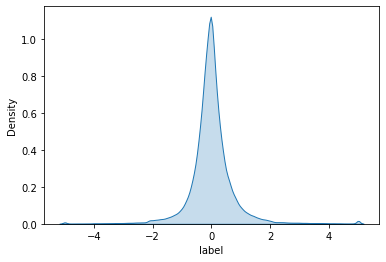

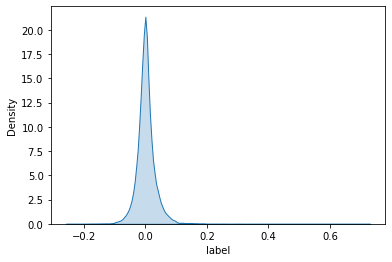

norm data done 

all works done 



In [6]:
# 特征工程、数据清洗，和拆分数据集
x_train, x_test, y_train, y_test, ymean, ystd = scutquant.auto_process(X, 'label', groupby='instrument', select=False)

In [7]:
x_train.head(5)

ma5      std5      max5      min5     beta5  \
datetime   instrument                                                     
2014-04-04 000001.SZ  -0.082918 -0.599424 -0.434785  0.522413 -0.014336   
           000002.SZ  -0.100485 -0.355025 -0.218241  0.280559  0.241240   
           000063.SZ   0.268508 -0.228151 -0.032360  0.302526  0.048487   
           000069.SZ   0.160699 -0.160354 -0.047369  0.238068 -0.220325   
           000157.SZ  -0.029129 -0.577204 -0.377801  0.586424 -0.030521   

                          roc5      ma10     std10     max10     min10  ...  \
datetime   instrument                                                   ...   
2014-04-04 000001.SZ   0.00205 -0.136511 -0.682457 -0.529826  0.619078  ...   
           000002.SZ   0.00205 -0.035595 -0.492803 -0.366649  0.515586  ...   
           000063.SZ   0.00205 -0.198100 -0.399803 -0.226579  0.413272  ...   
           000069.SZ   0.00205  0.153987 -0.345919 -0.237888  0.481048  ...   
           000157.SZ   0.00205 -0.121387 -0.701171 -0.486886  0.764199  ...   

                           rsv5     rsv10     rsv20     rsv30     rsv60  \
datetime   instrument                                                     
2014-04-04 000001.SZ   1.492085  1.506533  1.551076  1.563430  1.623340   
           000002.SZ   1.913048  1.916123  1.980544  2.002178  2.077625   
           000063.SZ   0.210165  0.213275  0.224123  0.229636  0.242315   
           000069.SZ   0.210647  0.213761  0.224622  0.230142  0.242839   
           000157.SZ   0.466934  0.469999  0.487985  0.496867  0.519009   

                          klen5    klen10    klen20    klen30    klen60  
datetime   instrument                                                    
2014-04-04 000001.SZ  -0.666300 -0.314826 -0.860879 -0.896411 -1.011354  
           000002.SZ  -0.478879 -0.647924 -0.829668 -0.899449 -0.990691  
           000063.SZ  -0.485793 -0.770904 -0.798720 -0.871389 -0.997927  
           000069.SZ  -0.181932 -0.566646 -0.666725 -0.805367 -0.950975  
           000157.SZ  -0.227946 -0.478697 -0.565177 -0.773033 -0.964459  

[5 rows x 105 columns]

In [8]:
# 拟合模型并预测
model = scutquant.auto_lrg(x_train, y_train, method='ols')

pred = model.predict(x_test)
pred = pd.DataFrame({'predict': pred}, index=x_test.index)
pred += ymean
pred *= ystd

pred

ols method will be used


predict
datetime   instrument          
2020-10-22 000568.SZ  -0.006977
           000596.SZ   0.003292
           000625.SZ   0.000673
           000651.SZ   0.003978
           000661.SZ   0.009552
...                         ...
2021-12-31 688169.SH  -0.000173
           688363.SH   0.003585
           688396.SH   0.000353
           688561.SH  -0.000225
           688599.SH  -0.002422

[84243 rows x 1 columns]

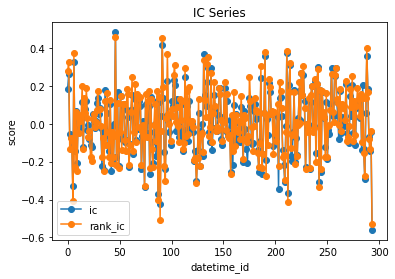

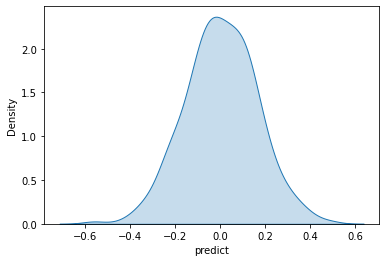

ic= 0.0025155925429627027 icir= 0.0157057599437355 rank_ic= 0.015259131643596767 rank_icir= 0.08845811805093086


In [9]:
# 评判拟合优度
ic, icir, rank_ic, rank_icir = scutquant.ic_ana(pred, y_test, groupby='datetime')
print('ic=', ic, 'icir=', icir, 'rank_ic=', rank_ic, 'rank_icir=', rank_icir)

In [10]:
# pearson相关系数
r = scutquant.pearson_corr(pred.values, y_test)
r

array([0.00245417])

In [11]:
# 以下为回测部分，暂时不作要求

df1 = df[df.index.isin(pred.index)]
df1 = df1.reset_index()
df1['t'] = df1['datetime']
df1 = df1.set_index(['datetime', 'instrument']).sort_index()

pred['t'] = df1['t']  
pred['price'] = df1['close']
pred.index.names = ['time', 'code']

acc={
    'cash': 1000000000,
    'position': None,
    'available': None,
    'ben_position': None,
}

In [12]:
from scutquant import executor

exe = executor.Executor(generator={'mode': 'generate'}, acc=acc, cost_buy=0.00015, cost_sell=0.00005, min_cost=5, risk_degree=0.95, 
                        auto_offset=True, offset_freq=2)
exe.execute(data=pred, verbose=0)

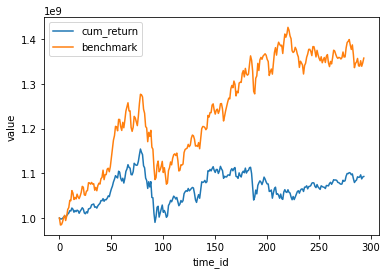

In [13]:
import matplotlib.pyplot as plt

user_account, benchmark = exe.user_account.val_hist, exe.benchmark.val_hist
acc_hist, ben_hist = pd.DataFrame({'value': user_account}), pd.DataFrame({'value': benchmark})

plt.plot(acc_hist, label='cum_return')
plt.plot(ben_hist, label='benchmark')
plt.xlabel('time_id')
plt.ylabel('value')
plt.legend()
plt.show()

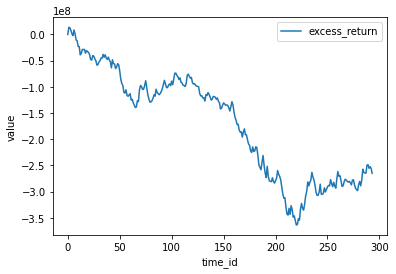

            value
293 -2.649898e+08


In [14]:
excess_return = acc_hist - ben_hist
plt.plot(excess_return, label='excess_return')
plt.xlabel('time_id')
plt.ylabel('value')
plt.legend()
plt.show()
print(excess_return.iloc[-1:])

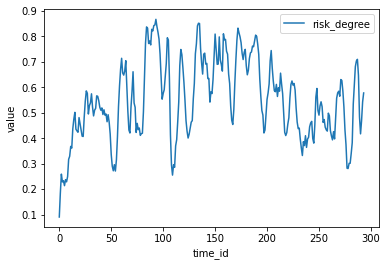

In [15]:
risk = pd.DataFrame({'risk': exe.user_account.risk_curve})

plt.plot(risk, label='risk_degree')
plt.xlabel('time_id')
plt.ylabel('value')
plt.legend()
plt.show()